#### Group Information
Group No: Derma_5

Member 1: Chai Kang Fook (159191) 
Member 2: Tan Wei Xiang (159762)
Member 3: Lee Soon Keat (158717)

#### Import libraries

In [39]:
%config Completer.use_jedi=False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, precision_score,recall_score, f1_score
import seaborn as sns
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn.naive_bayes import GaussianNB
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
from keras.models import Sequential
from keras.layers import Dense

#### Load the dataset

In [40]:
# Load the dataseet and create a dataframe "derma"
derma=pd.read_csv('dermatology.csv', header=None)

# Rename attributes and name the column
attribute_names=['erythema', 'scaling', 'definite borders', 'itching','koebner phenomenon','polygonal papules','follicular papules','oral mucosal involvement','knee and elbow involvement','scalp involvement','family history','melanin incontinence','eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis','acanthosis','hyperkeratosis','parakeratosis','clubbing of the rete ridges','elongation of the rete ridges','thinning of the suprapapillary epidermis','spongiform pustule','munro microabcess','focal hypergranulosis','disappearance of the granular layer','vacuolisation and damage of basal layer','spongiosis','saw-tooth appearance of retes','follicular horn plug','perifollicular parakeratosis','inflammatory monoluclear inflitrate','band-like infiltrate','age','Class code']  
derma.columns=attribute_names

#### Clean Data

In [41]:
# Count the sum of missing values of each attribute
derma.isnull().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history                              0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [42]:
# Count the occurrences of each value in the 'Class code' column of the 'derma' DataFrame
derma['Class code'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: Class code, dtype: int64

In [43]:
# Replace any '?' in the 'age' column with missing value (NaN) 
derma['age']=derma['age'].replace('?',np.nan)

# Drop row with missing value in the 'age' column
derma.dropna(subset=['age'],inplace=True)

In [44]:
# Count the occurrences of each value in the 'Class code' column of the 'derma' DataFrame
derma['Class code'].value_counts()

1    111
3     71
2     60
5     48
4     48
6     20
Name: Class code, dtype: int64

#### Split the dataset
Split the dataset into training, validation and test sets.

In [45]:
# Includes all the rows
# Includes all the columns except the last column (class code)
X=derma.iloc[:,:-1]

# Includes only the last column of every row
# Seperate the target variable (last column) from the features
y=derma.iloc[:,-1]

In [46]:
# Split the data into training and testing set
# X represent the features, y represent the target variable
# Split the data into 80% for training set and 20% for testing set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation set
# Split the training set into 70% for training set and 30% for validation set
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.3, random_state=42)

#### Data Visualization

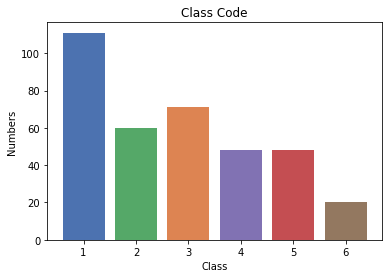

In [47]:
# Calculate the counter for classes
count=derma['Class code'].value_counts()

# Set custom color palette
colours=sns.color_palette('deep')[:len(count)]

# Create the bar chart
plt.bar(count.index, count.values, color=colours)

# Set the labels and title
plt.xlabel('Class')
plt.ylabel('Numbers')
plt.title('Class Code')

# Rotate x-axis labels if needed
plt.xticks()

# Display the plot
plt.show()

In [48]:
# Encode the label in 'y' using the LabelEncoder by creating an instance of LabelEncoder
# and fit_transform the labels in 'y'
y=LabelEncoder().fit_transform(y)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.001s...
[t-SNE] Computed neighbors for 358 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 4.441251
[t-SNE] Computed conditional probabilities in 0.026s
[t-SNE] Iteration 50: error = 47.2833939, gradient norm = 0.0152085 (50 iterations in 0.096s)
[t-SNE] Iteration 100: error = 46.9995346, gradient norm = 0.0003236 (50 iterations in 0.107s)
[t-SNE] Iteration 150: error = 46.9978676, gradient norm = 0.0004064 (50 iterations in 0.095s)
[t-SNE] Iteration 200: error = 46.9981384, gradient norm = 0.0015895 (50 iterations in 0.088s)
[t-SNE] Iteration 250: error = 46.9984665, gradient norm = 0.0004393 (50 iterations in 0.087s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.998466
[t-SNE] Iteration 300: error = 0.2591330, gradient norm = 0.0035813 (50 iterations in 0.081s)
[t-SNE] Iteration 350: error = 0.2452952, gradient norm = 0.0020217 

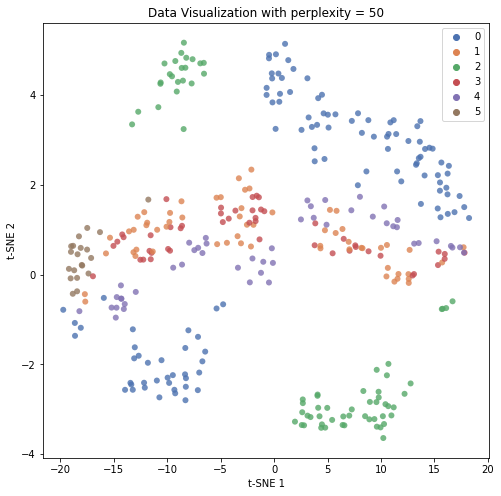

In [49]:
# Apply t-SNE
tsne=TSNE(n_components=2, random_state=42, verbose=2,perplexity=50)
tsne_X=tsne.fit_transform(X)


# Set the size of the figure/plot with width of 8 unit and a height of 8 unit
plt.figure(figsize=(8, 8))

# Create a scatter plot using the t-SNE transformed data
sns.scatterplot(
    # Set the x and y coordinates using the t-SNE components
    x=tsne_X[:,0], y=tsne_X[:,1],
    # Set the color of the point based on the target variable (y)
    hue=y, 
    # Set the color palette for the different classes in y
    palette=sns.color_palette("deep", len(np.unique(y))),
    # Set the transparency level of the points
    alpha=0.8, 
    # Set the color of the point edges to none
    edgecolor='none' 
)

# Set the title of the t-SNE plot
plt.title('t-SNE Plot for Dermatology Dataset')

# Label the x-axis 
plt.xlabel('t-SNE 1')

# Label the y-axis 
plt.ylabel('t-SNE 2')

# Label the plot's title
plt.title('Data Visualization with perplexity = 50')

# Add a legend to the plot and set its location to 'upper right'
plt.legend(loc='upper right')

# Show the plot
plt.show()

[t-SNE] Computing 357 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.001s...
[t-SNE] Computed neighbors for 358 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 21.729801
[t-SNE] Computed conditional probabilities in 0.066s
[t-SNE] Iteration 50: error = 31.5338421, gradient norm = 0.0000002 (50 iterations in 0.134s)
[t-SNE] Iteration 100: error = 31.5287590, gradient norm = 0.0000000 (50 iterations in 0.136s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 100 iterations with early exaggeration: 31.528759
[t-SNE] Iteration 150: error = 0.0021894, gradient norm = 0.0042734 (50 iterations in 0.126s)
[t-SNE] Iteration 200: error = -0.0012643, gradient norm = 0.0001215 (50 iterations in 3.735s)
[t-SNE] Iteration 250: error = -0.0010776, gradient norm = 0.0002583 (50 iterations in 1.459s)
[t-SNE] Iteration 300: error = -0.0009431, gradient norm = 0.0001798 (50 iterations in 0.167s)
[t-SNE] It

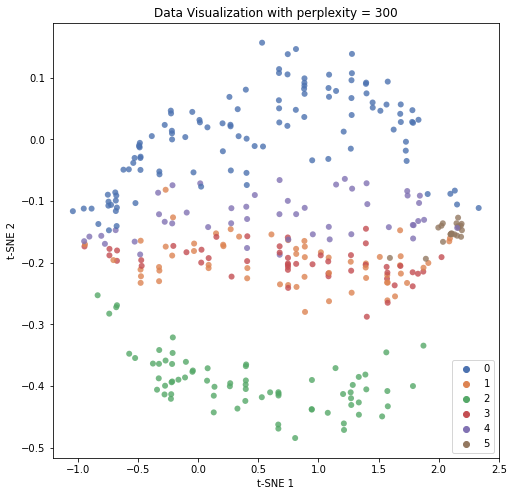

In [50]:
# Apply t-SNE
tsne=TSNE(n_components=2, random_state=42, verbose=2,perplexity=300)
tsne_X=tsne.fit_transform(X)

# Set the size of the figure/plot with width of 8 unit and a height of 8 unit
plt.figure(figsize=(8, 8))

# Create a scatter plot using the t-SNE transformed data
sns.scatterplot(
    # Set the x and y coordinates using the t-SNE components
    x=tsne_X[:,0], y=tsne_X[:,1],
    # Set the color of the points based on the target variable (y)
    hue=y, 
    # Set the color palette for the different classes in y
    palette=sns.color_palette("deep", len(np.unique(y))),
    # Set the transparency level of the points
    alpha=0.8, 
    # Set the color of the point edges to none
    edgecolor='none'
)

# Set the title of the t-SNE plot
plt.title('t-SNE Plot for Dermatology Dataset')

# Label the x-axis 
plt.xlabel('t-SNE 1')

# Label the y-axis 
plt.ylabel('t-SNE 2')

# Label the plot's title
plt.title('Data Visualization with perplexity = 300')

# Add a legend to the plot and set its location to 'lower right'
plt.legend(loc='lower right')

# Show the plot
plt.show()

#### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.

In [51]:
# Perform data standardization by standardizing the feature variables using StandardScaler

# Create an instance of StandardScaler
ss=StandardScaler()

# Standardize the training set
X_train_standard=ss.fit_transform(X_train)
X_train_standard_df=pd.DataFrame(X_train_standard, columns=X_train.columns, index=X_train.index)

# Standardize the validation set
X_val_standard=ss.transform(X_val)
X_val_standard_df=pd.DataFrame(X_val_standard, columns=X_val.columns, index=X_val.index)

# Standardize the testing set
X_test_standard=ss.transform(X_test)
X_test_standard_df=pd.DataFrame(X_test_standard, columns=X_test.columns, index=X_test.index)

# Update the original 'derma' DataFrame with the standardized values

# Update the rows and columns in the training set of 'derma'
# with the standardized values from X_train_standard_df
derma.loc[X_train.index, X_train.columns]=X_train_standard_df

# Update the rows and columns in the validation set of 'derma' 
# with the standardized values from X_val_standard_df
derma.loc[X_val.index, X_val.columns]=X_val_standard_df

# Update the rows and columns in the testing set of 'derma' 
# with the standardized values from X_test_standard_df
derma.loc[X_test.index, X_test.columns]=X_test_standard_df

#### Feature Selection

In [52]:
# Fit on training set
selector=SelectKBest(mutual_info_classif, k=20)
selector.fit(X_train_standard_df, y_train)

# Transform all sets
X_train_new=selector.transform(X_train_standard_df)
X_val_new=selector.transform(X_val_standard_df)
X_test_new=selector.transform(X_test_standard_df)

# Get the selected features
cols=selector.get_support(indices=True)
selected_features=X_train_standard_df.columns[cols]

# Print the selected features
print("Selected features:")
print(selected_features)

Selected features:
Index(['polygonal papules', 'oral mucosal involvement',
       'knee and elbow involvement', 'scalp involvement',
       'melanin incontinence', 'fibrosis of the papillary dermis',
       'exocytosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'munro microabcess',
       'focal hypergranulosis', 'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'band-like infiltrate', 'age'],
      dtype='object')


#### Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Neural Network or Fuzzy Logic System.
______________________________________________________________________________________
Description: We will be building 2 machine learning models which are 

In [53]:
# Initialize empty dictionaries to store the result and confusion matrix 
# by creating an empty dictionary to store the evaluation result
results={}

# Create an empty dictionary to store the confusion matrix result
confusion_matrix_results={}

#### Neural Network

In [54]:
# Measure the start time of the model training
start_time=time.time()

# Create an instance of MLPClassifier with max_iter=500
mlp=MLPClassifier(max_iter=500)

# Fit the MLPClassifier on the transformed training set
mlp.fit(X_train_new, y_train)

# Measure the end time of the model training
end_time=time.time()

# Make predictions on the transformed testing set
y_pred=mlp.predict(X_test_new)

# Calculate evaluation metrics and training time for Neural Network
# Calculate the accuracy score by comparing the true labels (y_test) with the predicted labels (y_pred)
accuracy=accuracy_score(y_test, y_pred)
# Calculate the precision score by comparing the true labels (y_test) with the predicted labels (y_pred)
# and set the average='weighted' to consider the weighted average precision score
precision=precision_score(y_test, y_pred, average='weighted')
# Calculate the recall score by comparing the true labels (y_test) with the predicted labels (y_pred)
# and set the average='weighted' to consider the weighted average recall score
recall=recall_score(y_test, y_pred, average='weighted')
# Calculate the F1 score by comparing the true labels (y_test) with the predicted labels (y_pred)
# and set the average='weighted' to consider the weighted average F1 score
f1=f1_score(y_test, y_pred, average='weighted')
# Calculate the training time by subtracting start time from end time
training_time=end_time - start_time

# Calculate confusion matrix
conf_matrix=confusion_matrix(y_test, y_pred)

# Print and store the results
results['Neural Network']=[accuracy, precision, recall, f1, training_time]

# Add the confusion matrix results (conf_matrix) 
# for Neural Network to the confusion_matrix_results dictionary
confusion_matrix_results['Neural Network']=conf_matrix

# Generate a classification report by comparing the true labels (y_test) 
# with the predicted labels (y_pred)
classification_rep_nn=classification_report(y_test, y_pred)

#### Random Forest

In [55]:
# Create an instance called 'rfc' of RandomForestClassifier
rfc=RandomForestClassifier()

# Measure the start time of the model training
start_time=time.time()

# Fit the Random Forest classifier on the transformed training set
rfc.fit(X_train_new, y_train)

# Measure the end time of the model training
end_time=time.time()

# Make predictions on the test set
y_pred=rfc.predict(X_test_new)

# Calculate evaluation metrics and training time for Random Forest
# Calculate the accuracy score by comparing the true labels (y_test) with the predicted labels (y_pred)
accuracy=accuracy_score(y_test, y_pred)
# Calculate the precision score by comparing the true labels (y_test) with the predicted labels (y_pred)
# Set average='weighted' to consider the weighted average precision score
precision=precision_score(y_test, y_pred, average='weighted')
# Calculate the recall score by comparing the true labels (y_test) with the predicted labels (y_pred)
# Set average='weighted' to consider the weighted average recall score
recall=recall_score(y_test, y_pred, average='weighted')
# Calculate the F1 score by comparing the true labels (y_test) with the predicted labels (y_pred)
# and set the average='weighted' to consider the weighted average F1 score
f1=f1_score(y_test, y_pred, average='weighted')
# Calculate the training time by subtracting start time from end time
training_time=end_time - start_time

# Calculate confusion matrix
conf_matrix=confusion_matrix(y_test, y_pred)

# Print and store the results
results['Random Forest Classifier'] = [accuracy, precision, recall, f1, training_time]

# Add the confusion matrix results (conf_matrix) 
# for Random Forest to the confusion_matrix_results dictionary
confusion_matrix_results['Random Forest'] = conf_matrix

# Create a classification report by comparing the true labels (y_test) 
# with the predicted labels (y_pred)
classification_rep_rfc = classification_report(y_test, y_pred)

#### Gaussian Naive Bayes

In [56]:
# Create an instance called 'gnb' of GaussianNB
gnb=GaussianNB()

# Measure the start time of the model training
start_time=time.time()

# Fit the Gaussian Naive Bayes classifier (gnb) on the transformed training set (X_train_new, y_train)
gnb.fit(X_train_new, y_train)

# Measure the end time of the model training
end_time=time.time()

# Make predictions on the test set
y_pred=gnb.predict(X_test_new)

# Calculate evaluation metrics and training time for Gaussian Naive Bayes
# Calculate the accuracy score by comparing the true labels (y_test) with the predicted labels (y_pred)
accuracy=accuracy_score(y_test, y_pred)
# Calculate the precision score by comparing the true labels (y_test) with the predicted labels (y_pred)
# Set average='weighted' to consider the weighted average precision score
precision=precision_score(y_test, y_pred, average='weighted')
# Calculate the recall score by comparing the true labels (y_test) with the predicted labels (y_pred)
# Set average='weighted' to consider the weighted average recall score
recall=recall_score(y_test, y_pred, average='weighted')
# Calculate the F1 score by comparing the true labels (y_test) with the predicted labels (y_pred)
# and set the average='weighted' to consider the weighted average F1 score
f1=f1_score(y_test, y_pred, average='weighted')
# Calculate the training time by subtracting start time from end time
training_time=end_time - start_time

# Calculate confusion matrix
conf_matrix=confusion_matrix(y_test, y_pred)

# Print and store the results
results['Gaussian Naive Bayes'] = [accuracy, precision, recall, f1, training_time]

# Add the confusion matrix results (conf_matrix) 
# for Gaussian Naive Bayes to the confusion_matrix_results dictionary
confusion_matrix_results['Gaussian Naive Bayes']=conf_matrix

# Create a classification report by comparing the true labels (y_test) 
# with the predicted labels (y_pred)
classification_rep_gnb=classification_report(y_test, y_pred)

#### Evaluate the models

#### # Print Accuracy, Precision, Recall, F1-Score, Training Time for Neural Network, Random Forest, and Gaussian Naives Bayes

In [57]:
# Create a DataFrame from the results dictionary, where each key represents a model
# The 'orient' parameter is set to 'index' to use the keys as row indices
# The columns are specified as ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time']
derma_results=pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])

In [58]:
derma_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Neural Network,0.902778,0.903770,0.902778,0.902058,0.729137
Random Forest Classifier,0.847222,0.858586,0.847222,0.850117,0.173663
Gaussian Naive Bayes,0.819444,0.856969,0.819444,0.792151,0.001986


#### # Print Confusion Matrix for Neural Netowrk

In [59]:
# Get the type of the model
model_type=type(mlp).__name__

# Print the model type
print("Model Type: ", model_type)

# Get the confusion matrix for the Neural Network model
conf_matrix=confusion_matrix_results['Neural Network']

# Print the confusion matrix for the Neural Network model
print("Confusion Matrix for Neural Network:")
print(conf_matrix)

Model Type:  MLPClassifier
Confusion Matrix for Neural Network:
[[22  0  0  0  0  0]
 [ 0 12  0  2  0  0]
 [ 0  0 13  1  0  0]
 [ 0  4  0  4  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0  2]]


#### # Print Confusion Matrix for Random Forect Classification

In [60]:
# Get the type of the model
model_type=type(rfc).__name__

# Print the model type
print("Model Type: ", model_type)

# Get the confusion matrix for the Random Forest model
conf_matrix=confusion_matrix_results['Random Forest']

# Print the confusion matrix for the Random Forest model
print("Confusion Matrix for Random Forest Classification:")
print(conf_matrix)

Model Type:  RandomForestClassifier
Confusion Matrix for Random Forest Classification:
[[22  0  0  0  0  0]
 [ 0  7  0  7  0  0]
 [ 0  0 14  0  0  0]
 [ 0  4  0  4  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0  2]]


#### # Print Confusion Matrix for Gaussian Naive Bayes

In [61]:
# Get the type of the model
model_type=type(gnb).__name__

# Print the model type
print("Model Type: ", model_type)

# Get the confusion matrix for the Gaussian Naive Bayes
conf_matrix=confusion_matrix_results['Gaussian Naive Bayes']

# Print the confusion matrix for the Gaussian Naive Bayes
print("Confusion Matrix for Gaussian Naive Bayes:")
print(conf_matrix)

Model Type:  GaussianNB
Confusion Matrix for Gaussian Naive Bayes:
[[22  0  0  0  0  0]
 [ 0  2  0 11  1  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  1  0  0 11  0]
 [ 0  0  0  0  0  2]]


#### # Print Classification Report for Neural Network

In [62]:
# Print the classification report for Neural Network
# Print a descriptive message indicating the type of model
print("Classification Report for Neural Network:")

# Print the classification report generated for the Neural Network model
print(classification_rep_nn)

Classification Report for Neural Network:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.75      0.86      0.80        14
           3       1.00      0.93      0.96        14
           4       0.57      0.50      0.53         8
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         2

    accuracy                           0.90        72
   macro avg       0.89      0.88      0.88        72
weighted avg       0.90      0.90      0.90        72



#### # Print Classification Report for Random Forest Classifier

In [63]:
# Print the classification report for Random Forest Classifier
# Print a descriptive message indicating the type of model
print("Classification Report for Random Forest Classifier:")

# Print the classification report generated for the Random Forest Classifier model
print(classification_rep_rfc)

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.64      0.50      0.56        14
           3       1.00      1.00      1.00        14
           4       0.36      0.50      0.42         8
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         2

    accuracy                           0.85        72
   macro avg       0.83      0.83      0.83        72
weighted avg       0.86      0.85      0.85        72



#### # Print Classification Report for Gaussian Naive Bayes

In [64]:
# Print the classification report for Gaussian Naive Bayes
# Print a descriptive message indicating the type of model
print("Classification Report for Gaussian Naive Bayes:")

# Print the classification report generated for the Gaussian Naive Bayes model
print(classification_rep_gnb)

Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.67      0.14      0.24        14
           3       1.00      1.00      1.00        14
           4       0.42      1.00      0.59         8
           5       0.92      0.92      0.92        12
           6       1.00      1.00      1.00         2

    accuracy                           0.82        72
   macro avg       0.83      0.84      0.79        72
weighted avg       0.86      0.82      0.79        72



#### Fine-Tuning 

#### # Neural Network

In [131]:
# Define the search space for hyperparameter optimization
space = [
    Real(1e-6, 1e-2, name='learning_rate', prior='log-uniform'),
    Integer(1, 5, name='hidden_layers'),
    Integer(50, 500, name='units_per_layer'),
    Categorical(['relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu'], name='activation_function'),
    Real(0.1, 0.5, name='dropout_rate'),
]

# Create a class for tracking the optimization progress
class OptimizationTracker:
    def __init__(self):
        self.best_score = None  # Initialize the best score attribute to None
        self.best_params = None  # Initialize the best params attribute to None

    def on_step(self, optim_result):
        # Update the best score and best params based on the optimization result
        
        # Retrieve the negative objective value (score) from the optimization result
        score = -optim_result.fun

        # Retrieve the optimized parameters (params) from the optimization result
        params = optim_result.x

        # Check if the best score is None or the current score is greater than the best score
        if self.best_score is None or score > self.best_score:
            # Update the best score with the current score
            self.best_score = score

            # Update the best params with the current params
            self.best_params = params

        # Print the current best score and best params
        print("Best score: %0.4f | Best params: %s" % (self.best_score, self.best_params))


@use_named_args(space)
def objective(learning_rate, hidden_layers, units_per_layer, activation_function, dropout_rate):
     # Model construction and training code
    model = keras.models.Sequential()

    model.add(keras.layers.InputLayer(input_shape=(X_train_new.shape[1],)))
    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(units_per_layer, activation=activation_function))
        model.add(Dropout(dropout_rate))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train_new, y_train)
    
    weights = class_weight.compute_sample_weight('balanced', y_train_res)
    class_weights = dict(enumerate(weights))
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train_res, y_train_res, epochs=200, validation_data=(X_val_new, y_val), verbose=0, callbacks=[early_stopping], class_weight=class_weights)
    
    _, accuracy = model.evaluate(X_val_new, y_val)  
    
    # Return the negative accuracy as the objective value
    return -accuracy 

# Create an instance of the OptimizationTracker class that track the optimization progress
tracker = OptimizationTracker()

# Store the result of the optimization process in the variable called 'res'
res = gp_minimize(objective, space, n_calls=50, random_state=42, callback=tracker.on_step, verbose=True)

Iteration No: 1 started. Evaluating function at random point.
3/3 [==============================] - 0s 3ms/step - loss: -304304096.0000 - accuracy: 0.2791
Best score: 0.2791 | Best params: [0.001535224694197351, 2, 401, 'relu', 0.2783331011414365]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 19.6227
Function value obtained: -0.2791
Current minimum: -0.2791
Iteration No: 2 started. Evaluating function at random point.
3/3 [==============================] - 0s 3ms/step - loss: -6.3812 - accuracy: 0.2791
Best score: 0.2791 | Best params: [0.001535224694197351, 2, 401, 'relu', 0.2783331011414365]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 18.3734
Function value obtained: -0.2791
Current minimum: -0.2791
Iteration No: 3 started. Evaluating function at random point.
3/3 [==============================] - 0s 5ms/step - loss: -9.4351 - accuracy: 0.0000e+00
Best score: 0.2791 | Best params: [0.001535224694197351, 2, 401, 'relu', 0.278333101141436

3/3 [==============================] - 0s 4ms/step - loss: -9825.9785 - accuracy: 0.2791
Best score: 0.2791 | Best params: [0.001535224694197351, 2, 401, 'relu', 0.2783331011414365]
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 41.6352
Function value obtained: -0.2791
Current minimum: -0.2791
Iteration No: 23 started. Searching for the next optimal point.
3/3 [==============================] - 0s 6ms/step - loss: -4322.4722 - accuracy: 0.2791
Best score: 0.2791 | Best params: [0.001535224694197351, 2, 401, 'relu', 0.2783331011414365]
Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 33.9774
Function value obtained: -0.2791
Current minimum: -0.2791
Iteration No: 24 started. Searching for the next optimal point.
3/3 [==============================] - 0s 8ms/step - loss: -9.8258 - accuracy: 0.2791
Best score: 0.2791 | Best params: [0.001535224694197351, 2, 401, 'relu', 0.2783331011414365]
Iteration No: 24 ended. Search finish

C:\Users\CKF\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


3/3 [==============================] - 0s 3ms/step - loss: -2058.6475 - accuracy: 0.2791
Best score: 0.2791 | Best params: [0.001535224694197351, 2, 401, 'relu', 0.2783331011414365]
Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 15.9097
Function value obtained: -0.2791
Current minimum: -0.2791
Iteration No: 39 started. Searching for the next optimal point.
3/3 [==============================] - 0s 4ms/step - loss: -929.7288 - accuracy: 0.2791
Best score: 0.2791 | Best params: [0.001535224694197351, 2, 401, 'relu', 0.2783331011414365]
Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 14.4692
Function value obtained: -0.2791
Current minimum: -0.2791
Iteration No: 40 started. Searching for the next optimal point.
3/3 [==============================] - 0s 4ms/step - loss: -1011.0504 - accuracy: 0.2791
Best score: 0.2791 | Best params: [0.001535224694197351, 2, 401, 'relu', 0.2783331011414365]
Iteration No: 40 ended. Search fini

In [132]:
# Extract and print the best hyperparameters and the corresponding best accuracy
# Create a dictionary of the best hyperparameters by zipping the names of the dimensions in 'space' with the values from 'res.x'
best_params = dict(zip([dim.name for dim in space], res.x))

# Obtain the best accuracy by negating the objective function value ('res.fun')
best_accuracy = -res.fun

# Print the best hyperparameters
print("Best hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Print the best accuracy on the validation set
print("Best accuracy on validation set:", best_accuracy)

Best hyperparameters:
learning_rate: 0.001535224694197351
hidden_layers: 2
units_per_layer: 401
activation_function: relu
dropout_rate: 0.2783331011414365
Best accuracy on validation set: 0.27906978130340576


#### # Random Forest Classifier

In [133]:
# Define the search space for hyperparameters
space = [
    Integer(1, 1000, name='n_estimators'),
    Integer(1, 20, name='max_depth'),
    Integer(2, 100, name='min_samples_split'),
    Integer(1, 100, name='min_samples_leaf'),
    Real(0.1, 1.0, name='max_features') 
]

# Define a class for tracking the optimization progress
# The 'OptimizationTracker' class is defined with an '__init__' method and an 'on_step' method
# The '__init__' method initialize the best score and best parameters as 'None'
# The 'on_step' method updates the best score and best parameters if a better score is obtained
# It prints the best score and best parameters at each step
class OptimizationTracker:
    def __init__(self):
        self.best_score = None
        self.best_params = None

    def on_step(self, optim_result):
        score = -optim_result.fun
        params = optim_result.x
        if self.best_score is None or score > self.best_score:
            self.best_score = score
            self.best_params = params
        print("Best score: %0.4f | Best params: %s" % (self.best_score, self.best_params))

# Define the objective function for optimization
# The objective function take the hyperparameters as keyword arguments
# and initialize a Random Forest classifier with the hyperparameter
# The classifier is trained on the 'X_train_new' and 'y_train' data
# Predictions are made on the 'X_val_new' data
# The accuracy of the predictions is calculated and returned as the objective value
@use_named_args(space)
def objective(**params):
    clf = RandomForestClassifier(**params)
    clf.fit(X_train_new, y_train)
    y_pred = clf.predict(X_val_new)
    score = accuracy_score(y_val, y_pred)
    return -score

# Create an instance of the OptimizationTracker class
tracker = OptimizationTracker()

# Perform Bayesian optimization
res = gp_minimize(objective, space, n_calls=50, random_state=42, callback=tracker.on_step, verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Best score: 0.3837 | Best params: [797, 4, 78, 60, 0.5012494775682321]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.3828
Function value obtained: -0.3837
Current minimum: -0.3837
Iteration No: 2 started. Evaluating function at random point.
Best score: 0.9419 | Best params: [101, 10, 35, 15, 0.6857996256539677]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1950
Function value obtained: -0.9419
Current minimum: -0.9419
Iteration No: 3 started. Evaluating function at random point.
Best score: 0.9419 | Best params: [101, 10, 35, 15, 0.6857996256539677]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1051
Function value obtained: -0.5116
Current minimum: -0.9419
Iteration No: 4 started. Evaluating function at random point.
Best score: 0.9651 | Best params: [618, 13, 3, 3, 0.5722971942325503]
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 

Best score: 0.9884 | Best params: [502, 8, 2, 1, 0.10549375259245522]
Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 2.8473
Function value obtained: -0.9884
Current minimum: -0.9884
Iteration No: 32 started. Searching for the next optimal point.
Best score: 0.9884 | Best params: [502, 8, 2, 1, 0.10549375259245522]
Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 2.6271
Function value obtained: -0.9884
Current minimum: -0.9884
Iteration No: 33 started. Searching for the next optimal point.
Best score: 0.9884 | Best params: [502, 8, 2, 1, 0.10549375259245522]
Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 2.5167
Function value obtained: -0.9651
Current minimum: -0.9884
Iteration No: 34 started. Searching for the next optimal point.
Best score: 0.9884 | Best params: [502, 8, 2, 1, 0.10549375259245522]
Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 0.7201
Functi

In [134]:
# Extract the best hyperparameters and the corresponding best accuracy

# Create a dictionary of the best hyperparameters by zipping the names of the dimensions in 'space' with the values from 'res.x'
best_params = dict(zip([dim.name for dim in space], res.x))

# Obtain the best accuracy by negating the objective function value ('res.fun')
best_accuracy = -res.fun

# Print the best hyperparameters
print("Best hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Print the best accuracy on the validation set
print("Best accuracy on the validation set:", best_accuracy)

Best hyperparameters:
n_estimators: 502
max_depth: 8
min_samples_split: 2
min_samples_leaf: 1
max_features: 0.10549375259245522
Best accuracy on the validation set: 0.9883720930232558


#### # Gaussian Naive Bayes

In [135]:
# Define the search space for hyperparameters
# The search space consists of a single hyperparameter, 'var_smoothing'
# which is a continuous variable bounded between 1e-9 and 1e-5
space = [Real(1e-9, 1e-5, name='var_smoothing')]

# Define the objective function for optimization
# The objective function takes the hyperparameters as keyword arguments
# and initializes a Gaussian Naive Bayes classifier with the hyperparameters
# The classifier is trained on the 'X_train_new' and 'y_train' data
# Predictions are made on the 'X_val_new' data
# and the accuracy of the predictions is calculated and returned as the objective value
@use_named_args(space)
def objective(**params):
    gnb = GaussianNB(**params)
    gnb.fit(X_train_new, y_train)
    y_pred = gnb.predict(X_val_new)
    accuracy = accuracy_score(y_val, y_pred)
    return -accuracy  

# Perform Bayesian optimization
res = gp_minimize(objective, space, n_calls=50, random_state=42, verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0115
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0065
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0026
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0050
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 6 started. 

C:\Users\CKF\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\CKF\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 0.1479
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 18 started. Searching for the next optimal point.
Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 0.1505
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 19 started. Searching for the next optimal point.
Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.1626
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 20 started. Searching for the next optimal point.
Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 0.1592
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.1724
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 22 st

C:\Users\CKF\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 0.3573
Function value obtained: -0.8721
Current minimum: -0.8837
Iteration No: 34 started. Searching for the next optimal point.
Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 0.3527
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 35 started. Searching for the next optimal point.
Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 0.3707
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 0.3498
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 37 started. Searching for the next optimal point.
Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 0.3570
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 38 st

C:\Users\CKF\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.4269
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.4096
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.4288
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 46 started. Searching for the next optimal point.


C:\Users\CKF\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 0.4762
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 47 started. Searching for the next optimal point.
Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 0.4915
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 48 started. Searching for the next optimal point.
Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 0.5255
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 49 started. Searching for the next optimal point.
Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 0.6087
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 50 started. Searching for the next optimal point.
Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 0.4403
Function value obtained: -0.8837
Current minimum: -0.8837


In [136]:
# Extract the best hyperparameters and the corresponding best accuracy

# Create a dictionary called 'best_params' that maps the names of the dimensions in 'space' to the values from 'res.x'
best_params = dict(zip([dim.name for dim in space], res.x))

# Calculate the best accuracy by negating the objective function value ('res.fun')
best_accuracy = -res.fun

# Print the best hyperparameters
print("Best hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Print the best accuracy on the validation set
print("Best accuracy on the validation set:", best_accuracy)

Best hyperparameters:
var_smoothing: 7.965633325615471e-06
Best accuracy on the validation set: 0.8837209302325582


#### Comparison

The Neural Network model had the greatest accuracy, precision, recall, and F1-score among the three models. However, in comparison to the other 2 models, it Neural Network model also takes more time to train. The Gaussian Naive Bayes model has the lowest accuracy and F1-score, whereas the Random Forest Classifier performs well with decent accuracy and precision scores.

#### Conclusion

In conclusion, the Neural Network model outperforms the other two models in terms of accuracy and overall performance, making it a good option for classification tasks. However, the decision should be made after an in-depth evaluation of all relevant variables and the project's particular needs.